In [4]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
torch.__version__


'1.11.0+cu102'

### Etapa 2: Base de dados

In [5]:
torch.manual_seed(123)


In [6]:
transform = transforms.ToTensor()


In [9]:
train = datasets.MNIST(root='.', train=True,
                       download=True, transform=transform)
test = datasets.MNIST(root='.', train=False,
                      download=True, transform=transform)


In [11]:
train.data[0]


tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [12]:
train.data.shape


torch.Size([60000, 28, 28])

In [13]:
torch.Size([60000, 28, 28])


torch.Size([60000, 28, 28])

In [14]:
train.targets


tensor([5, 0, 4,  ..., 5, 6, 8])

In [15]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128)
test_loader = torch.utils.data.DataLoader(test, batch_size=128)


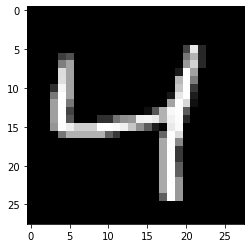

In [17]:
imagem = next(iter(train_loader))[0][2].view(28, 28)
plt.imshow(imagem, cmap='gray')


In [18]:
imagem.shape


torch.Size([28, 28])

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 784 BarContainer objects>)

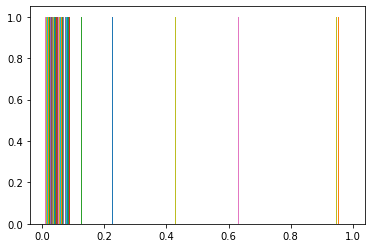

In [19]:
plt.hist(imagem.view(-1))


In [20]:
class classificador(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=32, kernel_size=(3, 3))
        self.conv2 = nn.Conv2d(
            in_channels=32, out_channels=32, kernel_size=(3, 3))
        self.activation = nn.ReLU()
        self.bnorm = nn.BatchNorm2d(num_features=32)
        self.poll = nn.MaxPool2d(kernel_size=(2, 2))
        self.flatten = nn.Flatten()

        # Camada de saida
        # 800 -> 128
        # output = (input - filter + 1) / stride
        # convolucao 1: (28 - 3 + 1) / 1 = 26
        # pooling 1: (26 - 2 + 1) / 2 = 13
        # convolucao 2: (13 - 3 + 1) / 1 = 11
        # pooling 2: (11 - 2 + 1) / 2 = 5
        self.linear1 = nn.Linear(in_features=32*5*5, out_features=128)
        self.linear2 = nn.Linear(in_features=128, out_features=128)
        self.output = nn.Linear(in_features=128, out_features=10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.poll(self.activation(self.bnorm(self.conv1(x))))
        x = self.poll(self.activation(self.bnorm(self.conv2(x))))
        x = self.flatten(x)

        x = self.dropout(self.activation(self.linear1(x)))
        x = self.dropout(self.activation(self.linear2(x)))
        x = self.output(x)

        return x


In [21]:
net = classificador()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())


In [23]:
device = torch.device(
    'cuda') if torch.cuda.is_available() else torch.device('cpu')

net.to(device)


classificador(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (activation): ReLU()
  (bnorm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (poll): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=800, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [27]:
def training_loop(loader, epoch):
    running_loss = 0.
    running_accuracy = 0.

    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        ps = F.softmax(outputs)
        top_p, top_class = ps.topk(k=1, dim=1)
        equals = top_class == labels.view(*top_class.shape)

        accuracy = torch.mean(equals.type(torch.float))

        # Imprimindo os dados referentes a este loop
        print('\rÉpoca {:3d} - Loop {:3d} de {:3d}: perda {:03.2f} - precisão {:03.2f}'.format(epoch + 1, i + 1, len(loader), loss,
                                                                                               accuracy), end='\r')

    # Imprimindo os dados referentes a esta época
    print('\rÉPOCA {:3d} FINALIZADA: perda {:.5f} - precisão {:.5f}'.format(epoch+1, running_loss/len(loader),
                                                                            running_accuracy/len(loader)))


In [28]:
for epoch in range(5):
    print("Treinando época {}".format(epoch + 1))
    training_loop(train_loader, epoch)
    net.eval()
    print("Valitando...")
    training_loop(test_loader, epoch)
    net.train()


Treinando época 1


/tmp/ipykernel_2256/3297065101.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ps = F.softmax(outputs)


ÉPOCA   1 FINALIZADA: perda 0.06202 - precisão 0.000009
Valitando...
ÉPOCA   1 FINALIZADA: perda 0.15204 - precisão 0.000000
Treinando época 2
ÉPOCA   2 FINALIZADA: perda 0.05457 - precisão 0.000009
Valitando...
ÉPOCA   2 FINALIZADA: perda 0.10328 - precisão 0.000000
Treinando época 3
ÉPOCA   3 FINALIZADA: perda 0.04254 - precisão 0.000008
Valitando...
ÉPOCA   3 FINALIZADA: perda 0.06559 - precisão 0.000000
Treinando época 4
ÉPOCA   4 FINALIZADA: perda 0.03814 - precisão 0.000009
Valitando...
ÉPOCA   4 FINALIZADA: perda 0.05090 - precisão 0.000000
Treinando época 5
ÉPOCA   5 FINALIZADA: perda 0.03471 - precisão 0.000009
Valitando...
ÉPOCA   5 FINALIZADA: perda 0.06363 - precisão 0.000000


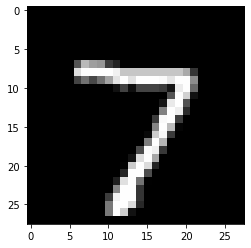

In [29]:
imagem = next(iter(test_loader))[0][0].view(28, 28)
plt.imshow(imagem, cmap='gray')

In [30]:
# (1,1, 28, 28) - (batch_size, channels, height, width)
imagem.shape

torch.Size([28, 28])

In [31]:
imagem = imagem.view(1, 1, 28, 28)
imagem.shape

torch.Size([1, 1, 28, 28])

In [32]:
net.eval()
imagem = imagem.to(device)


In [33]:
previsao = net.forward(imagem)
previsao

tensor([[-4.3196, -1.7378, -2.3600, -0.1216, -3.3653, -3.9088, -9.1959,  6.9525,
         -2.7141,  0.2198]], grad_fn=<AddmmBackward0>)

In [34]:
previsao = F.softmax(previsao)
previsao

/tmp/ipykernel_2256/4111643229.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  previsao = F.softmax(previsao)


tensor([[1.2693e-05, 1.6781e-04, 9.0074e-05, 8.4470e-04, 3.2960e-05, 1.9140e-05,
         9.6785e-08, 9.9758e-01, 6.3216e-05, 1.1884e-03]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
previsao = previsao.detach().cpu().numpy()